# Project 1 - Revisited

# Prediction of Product Sales
  - Author: Cory N. Cates
## Project Overview
## Load and Inspect Data



**Variable Name & Description**
- **Item_Identifier**	- Product ID
- **Item_Weight	Weight** - of product
- **Item_Fat_Content**	- Whether the product is low-fat or regular
- **Item_Visibility**	- The percentage of total display area of all products in a   
  store allocated to the particular product
- **Item_Type**	- The category to which the product belongs
- **Item_MRP**	- Maximum Retail Price (list price) of the product
- **Outlet_Identifier**	Store ID
- **Outlet_Establishment_Year**	- The year in which store was established
- **Outlet_Size**	- The size of the store in terms of ground area covered
- **Outlet_Location_Type**	- The type of area in which the store is located
- **Outlet_Type**	- Whether the outlet is a grocery store or some sort of     supermarket
- **Item_Outlet_Sales	Sales** - of the product in the particular store. This is the
  target variable to be predicted.

Original Kaggle Data:  https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view?usp=sharing

# Evaluate using the built in Coding Snippets ******************START****************

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)



In [2]:
# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function

def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df_predict[[x,y]].corr(numeric_only=True).round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

In [3]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax



In [4]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

In [5]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



In [6]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")


In [7]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances



In [8]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax



In [9]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False):
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
        
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
        
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    
    ## return ax in case want to continue to update/modify figure
    return ax


In [10]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5), 
                intercept=False, intercept_name="intercept", 
                annotate=False, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

In [11]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [12]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs


In [13]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax


In [14]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

# Data Visualizations Course Project 1

In [15]:
# Save path of file and inspect data

fpath= ('/Users/corycates/Documents/GitHub/Prediction-of-Product-Sales/sales_predictions_2023 (1) (1).csv')

df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)
df.head(3)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [17]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)



/var/folders/09/79h56n6j76v7kwxgc8kt2c5c0000gn/T/ipykernel_38489/3470936362.py:8: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  "min":df.min(),
/var/folders/09/79h56n6j76v7kwxgc8kt2c5c0000gn/T/ipykernel_38489/3470936362.py:9: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'max':df.max()


,Column,dtype,# null,null (%),nunique,min,max
0,Item_Fat_Content,object,0,0.000000,5,LF,reg
1,Item_Identifier,object,0,0.000000,1559,DRA12,NCZ54
2,Item_MRP,float64,0,0.000000,5938,31.29,266.8884
3,Item_Outlet_Sales,float64,0,0.000000,3493,33.29,13086.9648
4,Item_Type,object,0,0.000000,16,Baking Goods,Starchy Foods
5,Item_Visibility,float64,0,0.000000,7880,0.0,0.328391
6,Item_Weight,float64,1463,17.165317,415,4.555,21.35
7,Outlet_Establishment_Year,int64,0,0.000000,9,1985,2009
8,Outlet_Identifier,object,0,0.000000,10,OUT010,OUT049
9,Outlet_Location_Type,object,0,0.000000,3,Tier 1,Tier 3


In [18]:
# check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.2.2


# Going with the original target of Item_Outlet_Sales

In [19]:
## Make x and y variables
y = df['Item_Outlet_Sales'].copy()
X = df.drop(columns=['Item_Outlet_Sales']).copy()
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8269,FDI60,7.220,Regular,0.064142,Baking Goods,61.2510,OUT010,1998,NaN,Tier 3,Grocery Store
7604,DRD25,6.135,LF,0.079294,Soft Drinks,111.2860,OUT018,2009,Medium,Tier 3,Supermarket Type2
2762,NCP18,12.150,Low Fat,0.028593,Household,151.0708,OUT035,2004,Small,Tier 2,Supermarket Type1
6464,NCS30,5.945,LF,0.093009,Household,127.8652,OUT035,2004,Small,Tier 2,Supermarket Type1
4707,FDI08,18.200,Regular,0.066285,Fruits and Vegetables,247.2092,OUT035,2004,Small,Tier 2,Supermarket Type1


## Cleaning

In [20]:

# Drop Identifier Columns
df_cleaned = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

# Clean up 'Item_Fat_Content' Column
df_cleaned['Item_Fat_Content'] = df_cleaned['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

# Handle Missing Values
df_cleaned['Item_Weight'].fillna(df_cleaned['Item_Weight'].mean(), inplace=True)
df_cleaned['Outlet_Size'].fillna(df_cleaned['Outlet_Size'].mode()[0], inplace=True)

# Encode Categorical Columns
# pd.get_dummies is used to convert categorical variable(s) into dummy/indicator variables, creating
# a new binary column for each category/label present in the categorical column(s).
# Each row in the dataset will have a value of '1' in the column corresponding to its category and '0' in others.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])


## Preprocessing + ColumnTransformer

In [21]:
## make categorical selector and verify it works 
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

## make numeric selector and verify it works 
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)




['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [22]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()  
)




In [23]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor



ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16d32d3a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16d32d400>)],
                  verbose_feature_names_out=False)

##  Remaking Train and Test into Data Frames with New Feature Names

In [24]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names



/usr/local/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [25]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,-1.319041,-0.043295,-1.268171,0.026015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,-1.574485,0.248066,-0.459996,1.338206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,-0.158360,-0.726880,0.182616,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8077,0.571480,-0.093503,-0.120626,1.099626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2391,1.183604,-0.421698,-0.204533,-0.093275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
163,-1.307269,0.090081,-0.412092,-0.093275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)



8077    1696.4584
2391    2024.0320
163     2618.5914
Name: Item_Outlet_Sales, dtype: float64

## TREES Feature Importance

In [28]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)



Training Data:	R^2= 0.94	RMSE= 421.83
Test Data:	R^2= 0.56	RMSE= 1162.57


In [29]:
reg.feature_importances_



array([0.02993713, 0.0569307 , 0.40322524, ..., 0.00206687, 0.00097309,
       0.02672925])

In [30]:
## Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)



1600
1600


True

In [31]:
importances = get_importances(reg,sort=True,ascending=False)
importances



Item_MRP                     4.032252e-01
Outlet_Type_Grocery Store    1.967582e-01
Item_Visibility              5.693070e-02
Outlet_Identifier_OUT027     3.205621e-02
Item_Weight                  2.993713e-02
                                 ...     
Item_Identifier_NCK31        1.417405e-07
Item_Identifier_FDQ04        1.006541e-07
Item_Identifier_FDX48        5.128422e-08
Item_Identifier_FDQ60        4.157194e-08
Item_Identifier_FDX24        1.153220e-08
Name: Feature Importance, Length: 1600, dtype: float64

## Plotting our features now....but going to reduce it to the top 15

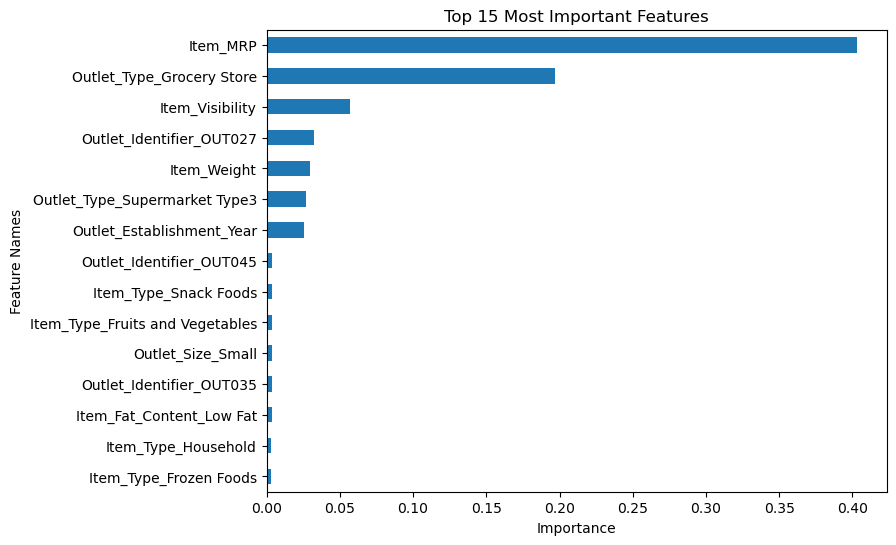

In [32]:
## testing our function
importances = get_importances(reg,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=15);



## Practice of remaking the model with Functions Using top 10

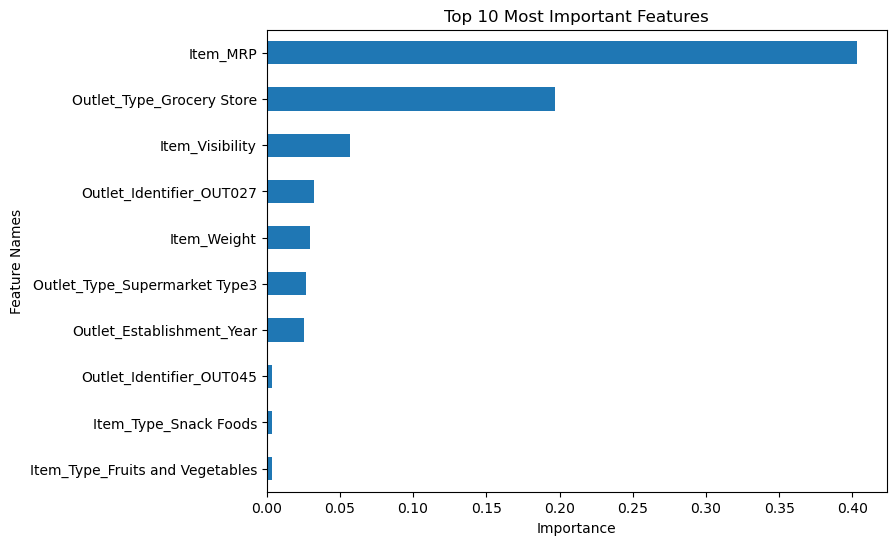

In [33]:
## 
importances = get_importances(reg,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=10);


## Exploring Important features (5 First)

In [34]:
importances.sort_values(ascending=False).head(5)


Item_MRP                     0.403225
Outlet_Type_Grocery Store    0.196758
Item_Visibility              0.056931
Outlet_Identifier_OUT027     0.032056
Item_Weight                  0.029937
Name: RandomForest Importances, dtype: float64

In [35]:
plot_train = pd.concat([X_train_df,y_train],axis=1)
plot_test = pd.concat([X_test_df,y_test],axis=1)
plot_df = pd.concat([plot_train, plot_test])
plot_df


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
8269,-1.319041,-0.043295,-1.268171,0.026015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,126.5020
7604,-1.574485,0.248066,-0.459996,1.338206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2263.7200
2762,-0.158360,-0.726880,0.182616,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2858.9452
6464,-1.619217,0.511794,-0.192206,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2195.8084
4707,1.266006,-0.002094,1.735461,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3486.1288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,0.006443,-0.637393,0.527811,0.503176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4483.4972
5323,1.042345,-0.558724,0.387455,1.338206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3289.0520
22,0.418449,-0.782544,0.916532,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1587.2672
4526,0.241875,-0.608176,-0.412134,1.099626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1853.5872


In [36]:
importances.sum()



1.0

### Sum up to 1 as expected

In [37]:
## Saving the feature importances sorted from largest to smallest (ascending=False)
sorted_importance = importances.sort_values()
sorted_importance



Item_Identifier_FDX24        1.153220e-08
Item_Identifier_FDQ60        4.157194e-08
Item_Identifier_FDX48        5.128422e-08
Item_Identifier_FDQ04        1.006541e-07
Item_Identifier_NCK31        1.417405e-07
                                 ...     
Item_Weight                  2.993713e-02
Outlet_Identifier_OUT027     3.205621e-02
Item_Visibility              5.693070e-02
Outlet_Type_Grocery Store    1.967582e-01
Item_MRP                     4.032252e-01
Name: RandomForest Importances, Length: 1600, dtype: float64

### Checking out the top 10 importances

Training Data:	R^2= 0.94	RMSE= 421.83
Test Data:	R^2= 0.56	RMSE= 1162.57


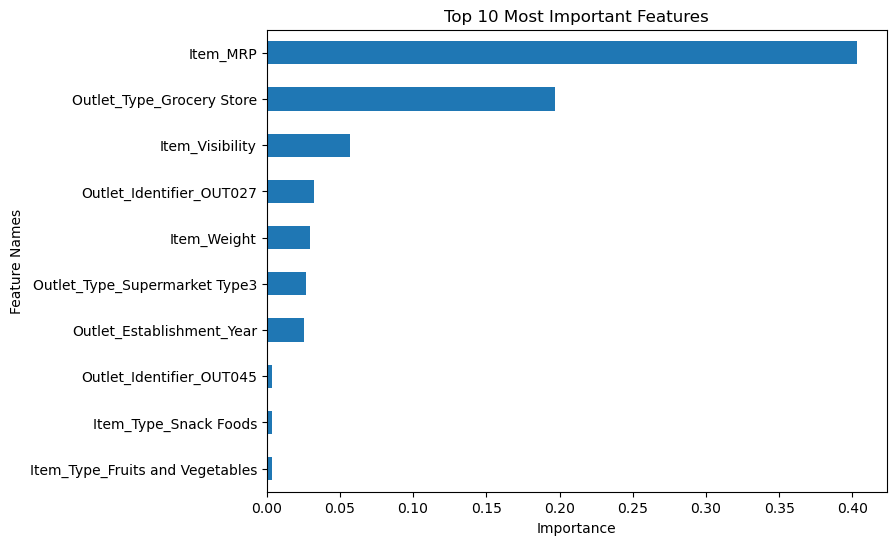

In [38]:
## fit random forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=10);


- **Item MRP** is by far the single most important feature.
- **The Outlet Type** is the second most important.
- **Item Visibility**, **Outlet ID**, **Item Weight**, and **Type3** are somewhat important.
- Everything else is unimportant.

### Observations on Feature Importance:
The **MRP Feature** was heavily used to predict the target, but it is crucial to note that we **don't know** the actual relationship between the feature and the target.

### Model Performance and Overfitting:
The model performs very well on the training data but significantly worse on the test data. This discrepancy between training and test performance suggests that the model may be overfitting to the training data. Overfitting occurs when a model learns the training data too well, capturing noise in the training data as if it were a real pattern, which then adversely affects its performance on new, unseen data.

### Recommendations:
To address overfitting, next time....consider simplifying the model, using regularization techniques, or obtaining more training data. Additionally, performing cross-validation can give a more robust estimate of the model's performance on unseen data.

### Disclaimer:
This analysis is based solely on the model's performance and does not take into account any real-world implications or use cases of the model.


### Lets Plot the Tree......Another way to Visualize

In [39]:
example_tree =  reg.estimators_[0]
example_tree


DecisionTreeRegressor(max_features=1.0, random_state=1657633780)

In [40]:
evaluate_regression(example_tree,X_train_df, y_train, X_test_df,y_test)


Training Data:	R^2= 0.72	RMSE= 895.90
Test Data:	R^2= 0.28	RMSE= 1488.61


/usr/local/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [41]:
example_tree.get_depth()


61

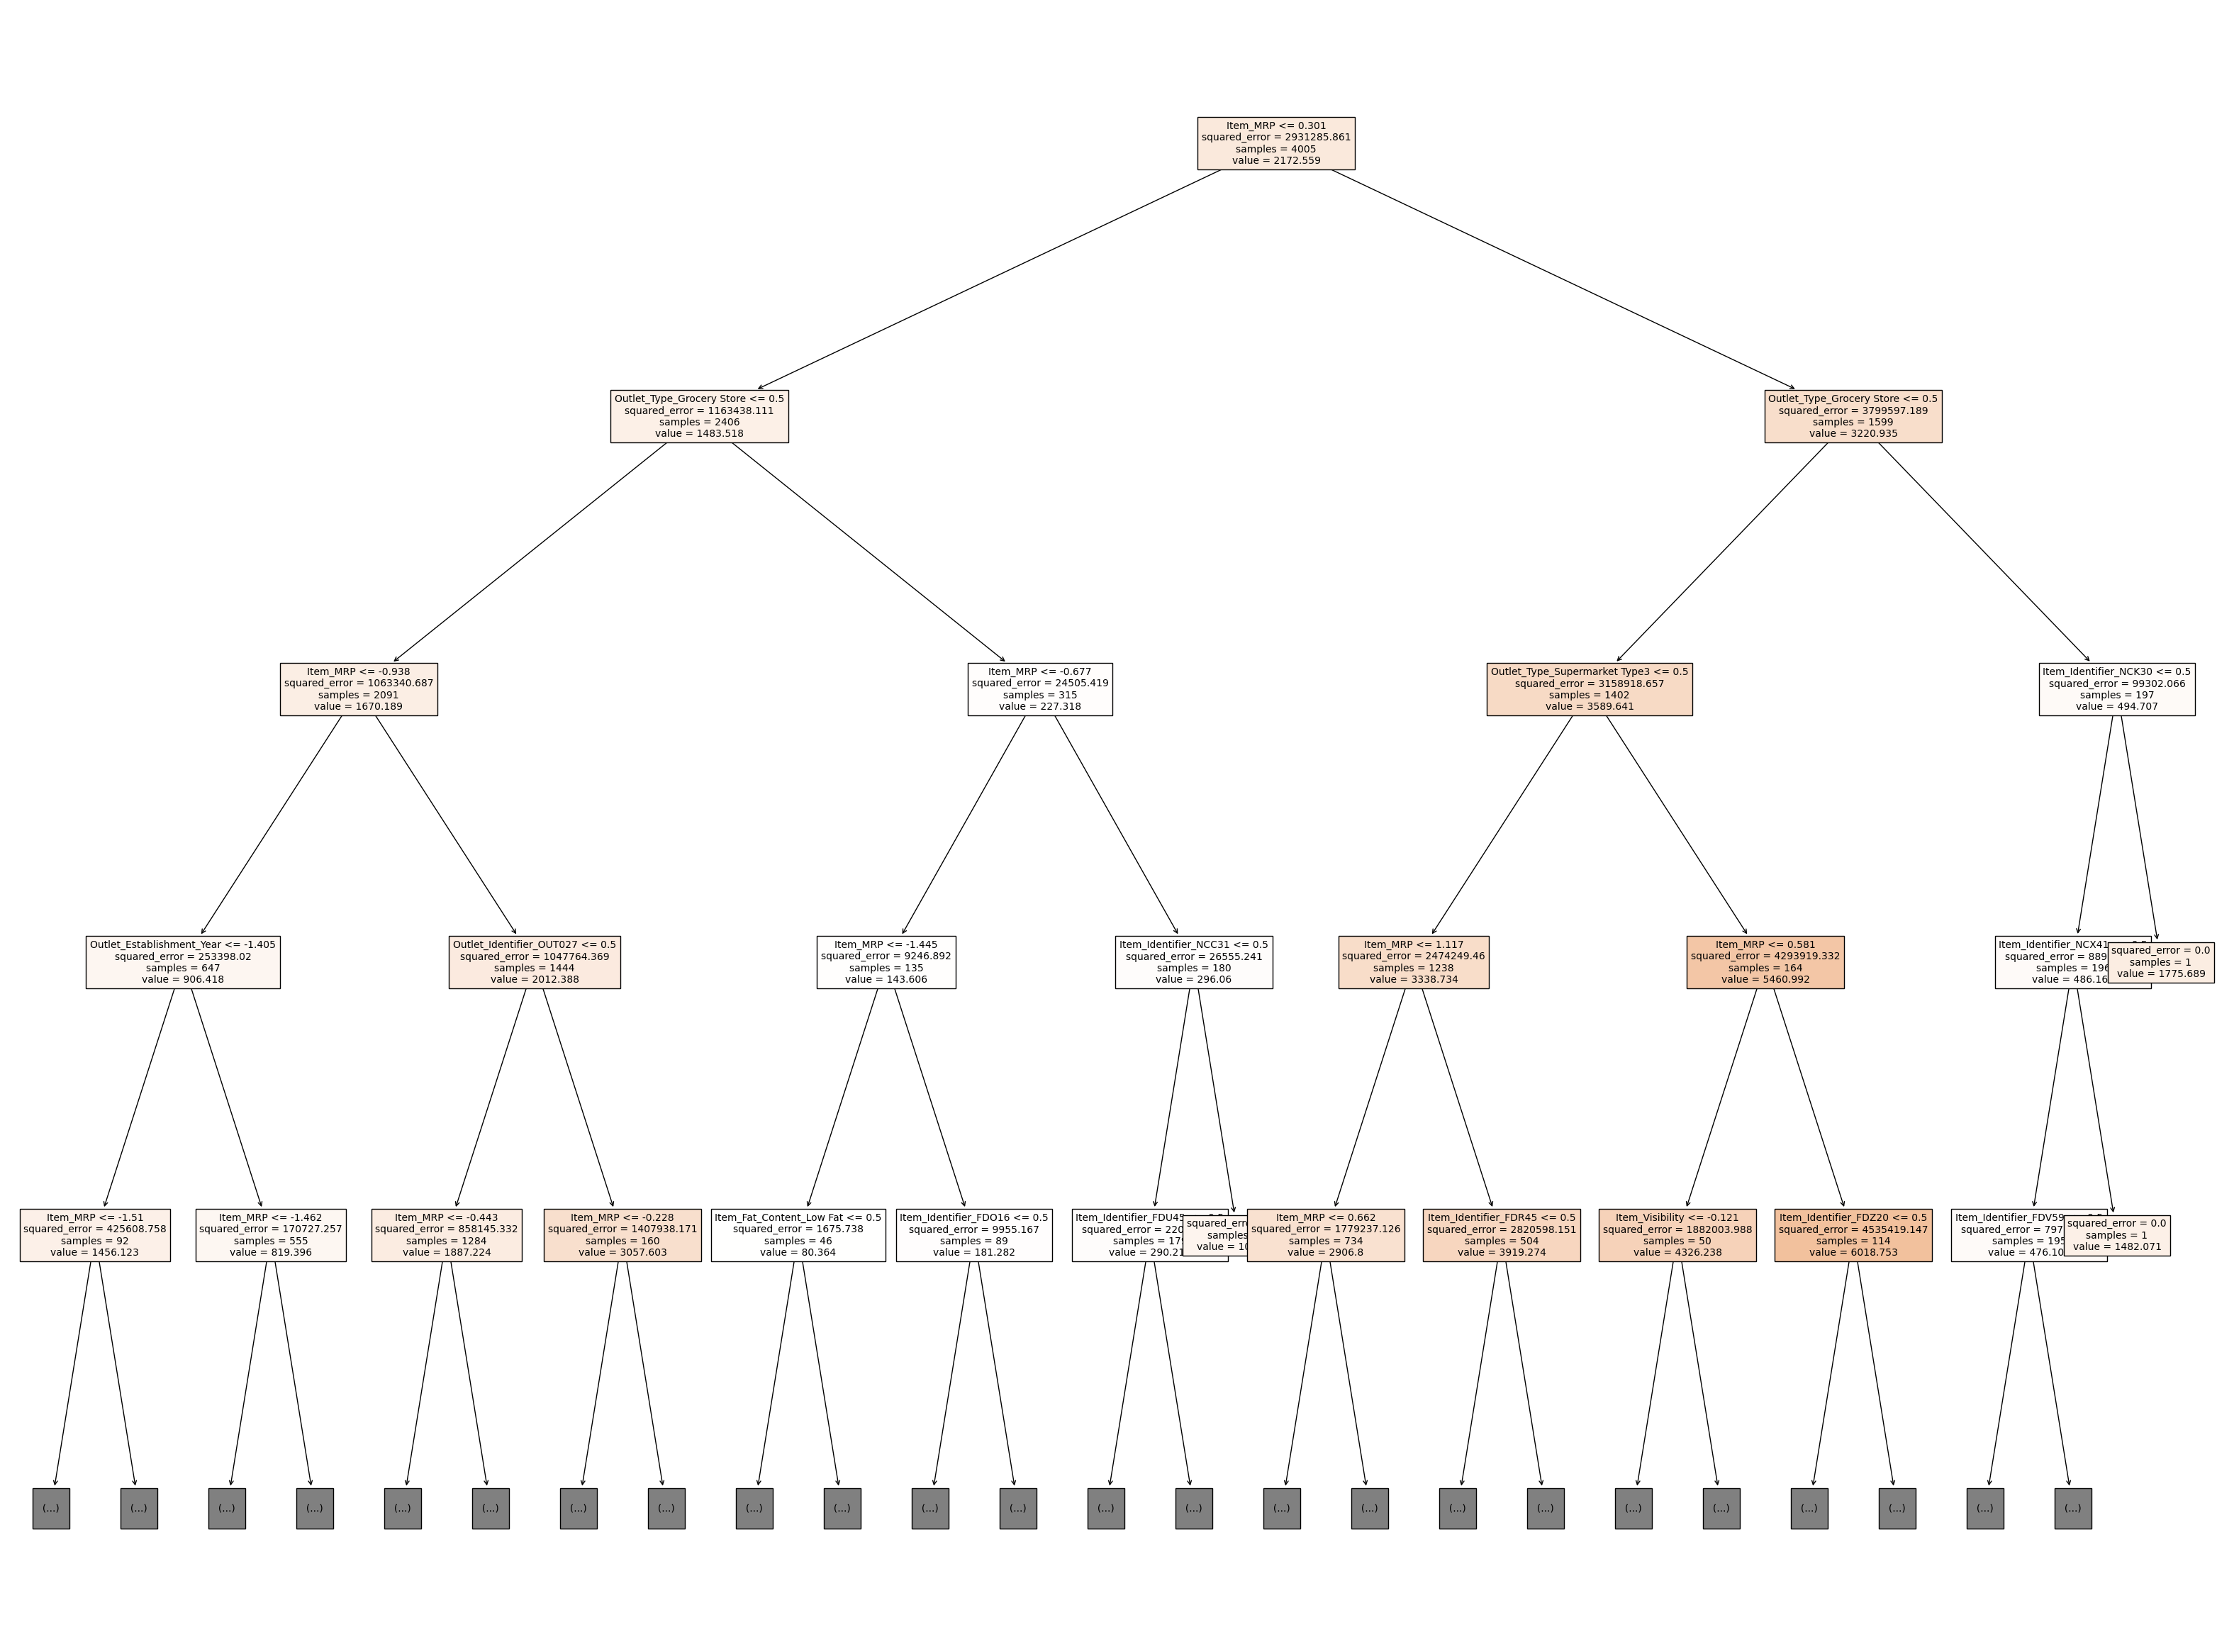

In [42]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(example_tree, max_depth=4,filled=True,feature_names=feature_names,ax=ax,
         fontsize=10);



In [43]:
fig.savefig('example_tree.png',dpi=300)


## Serialization

In [45]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train,
         'y_train': y_train,
         'X_test':X_test,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForest':reg}
joblib.dump(export, 'random_forest_l01.joblib')


['random_forest_l01.joblib']

# Linear Reg 

### I only need the top three so I'm going to remove some items

In [46]:
# Remaking.....Just being on the safe side

fpath= ('/Users/corycates/Documents/GitHub/Prediction-of-Product-Sales/sales_predictions_2023 (1) (1).csv')

df = pd.read_csv(fpath)

def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)


/var/folders/09/79h56n6j76v7kwxgc8kt2c5c0000gn/T/ipykernel_38489/3352556446.py:14: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  "min":df.min(),
/var/folders/09/79h56n6j76v7kwxgc8kt2c5c0000gn/T/ipykernel_38489/3352556446.py:15: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'max':df.max()


,Column,dtype,# null,null (%),nunique,min,max
0,Item_Fat_Content,object,0,0.000000,5,LF,reg
1,Item_Identifier,object,0,0.000000,1559,DRA12,NCZ54
2,Item_MRP,float64,0,0.000000,5938,31.29,266.8884
3,Item_Outlet_Sales,float64,0,0.000000,3493,33.29,13086.9648
4,Item_Type,object,0,0.000000,16,Baking Goods,Starchy Foods
5,Item_Visibility,float64,0,0.000000,7880,0.0,0.328391
6,Item_Weight,float64,1463,17.165317,415,4.555,21.35
7,Outlet_Establishment_Year,int64,0,0.000000,9,1985,2009
8,Outlet_Identifier,object,0,0.000000,10,OUT010,OUT049
9,Outlet_Location_Type,object,0,0.000000,3,Tier 1,Tier 3


In [47]:

# Drop Identifier Columns
df_cleaned = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

# Clean up 'Item_Fat_Content' Column
df_cleaned['Item_Fat_Content'] = df_cleaned['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

# Handle Missing Values
df_cleaned['Item_Weight'].fillna(df_cleaned['Item_Weight'].mean(), inplace=True)
df_cleaned['Outlet_Size'].fillna(df_cleaned['Outlet_Size'].mode()[0], inplace=True)

# Encode Categorical Columns
# pd.get_dummies is used to convert categorical variable(s) into dummy/indicator variables, creating
# a new binary column for each category/label present in the categorical column(s).
# Each row in the dataset will have a value of '1' in the column corresponding to its category and '0' in others.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])


In [48]:

# Making X and y variables
y = df_cleaned['Item_Outlet_Sales'].copy()
X = df_cleaned.drop(columns=['Item_Outlet_Sales']).copy()

# Performing a train-test split with a random state for reproducibility
SEED = 321  # Replace with the SEED value you used
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)


In [49]:
## make categorical selector and verify it works 
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

## make numeric selector and verify it works 
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)


cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='MISSING'),
    OneHotEncoder(drop = 'first', sparse=False)
)

num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()  
)





In [50]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor



ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16e593070>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16e5935b0>)],
                  verbose_feature_names_out=False)

In [51]:

## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names




/usr/local/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [52]:
X_train = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train.head(3)



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,-1.320469,-0.043295,-1.268171,0.026015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7604,-1.575911,0.248066,-0.459996,1.338206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2762,-0.159793,-0.726880,0.182616,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [53]:
X_test = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test.head(3)



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8077,0.570044,-0.093503,-0.120626,1.099626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2391,1.182164,-0.421698,-0.204533,-0.093275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
163,-1.308697,0.090081,-0.412092,-0.093275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [54]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)



8077    1696.4584
2391    2024.0320
163     2618.5914
Name: Item_Outlet_Sales, dtype: float64

In [55]:
## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)



LinearRegression()

In [56]:
# Evaluating the Linear Regression model using the provided function
evaluate_regression(lin_reg, X_train, y_train, X_test, y_test)

Training Data:	R^2= 0.56	RMSE= 1115.38
Test Data:	R^2= 0.56	RMSE= 1164.77


In [57]:
# Tip: sklearn models now store the feature names in .feature_names_in_!
lin_reg.feature_names_in_



array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [58]:
lin_reg.coef_


array([    4.75465902,   -14.3773127 ,   966.17298549,   353.38097341,
          31.44506757,   -12.45000962,    60.77971115,    15.37277241,
         -57.41802007,   -14.17438853,     7.99395772,    44.20562505,
         -50.03327112,   -77.5252829 ,   -20.69781814,     9.22376735,
          90.93210544,   -18.08414433,  -127.41655206,    22.91969548,
       -1015.22802067,  -927.39008494,  -234.04177357,  -492.46147977,
        1407.65734265,  1169.54048628,  3867.41148563])

In [59]:
## Checking the number of coeffs matches the # of feature names
print(len(lin_reg.coef_))
len(feature_names)


27


27

In [60]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= feature_names)
coeffs


Item_Weight                           4.754659
Item_Visibility                     -14.377313
Item_MRP                            966.172985
Outlet_Establishment_Year           353.380973
Item_Fat_Content_Regular             31.445068
Item_Type_Breads                    -12.450010
Item_Type_Breakfast                  60.779711
Item_Type_Canned                     15.372772
Item_Type_Dairy                     -57.418020
Item_Type_Frozen Foods              -14.174389
Item_Type_Fruits and Vegetables       7.993958
Item_Type_Hard Drinks                44.205625
Item_Type_Health and Hygiene        -50.033271
Item_Type_Household                 -77.525283
Item_Type_Meat                      -20.697818
Item_Type_Others                      9.223767
Item_Type_Seafood                    90.932105
Item_Type_Snack Foods               -18.084144
Item_Type_Soft Drinks              -127.416552
Item_Type_Starchy Foods              22.919695
Outlet_Size_Medium                -1015.228021
Outlet_Size_S

In [61]:
# use .loc to add the intercept to the series
coeffs.loc['intercept'] = lin_reg.intercept_
coeffs

Item_Weight                           4.754659
Item_Visibility                     -14.377313
Item_MRP                            966.172985
Outlet_Establishment_Year           353.380973
Item_Fat_Content_Regular             31.445068
Item_Type_Breads                    -12.450010
Item_Type_Breakfast                  60.779711
Item_Type_Canned                     15.372772
Item_Type_Dairy                     -57.418020
Item_Type_Frozen Foods              -14.174389
Item_Type_Fruits and Vegetables       7.993958
Item_Type_Hard Drinks                44.205625
Item_Type_Health and Hygiene        -50.033271
Item_Type_Household                 -77.525283
Item_Type_Meat                      -20.697818
Item_Type_Others                      9.223767
Item_Type_Seafood                    90.932105
Item_Type_Snack Foods               -18.084144
Item_Type_Soft Drinks              -127.416552
Item_Type_Starchy Foods              22.919695
Outlet_Size_Medium                -1015.228021
Outlet_Size_S

In [62]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs


Item_Weight                            4.75
Item_Visibility                      -14.38
Item_MRP                             966.17
Outlet_Establishment_Year            353.38
Item_Fat_Content_Regular              31.45
Item_Type_Breads                     -12.45
Item_Type_Breakfast                   60.78
Item_Type_Canned                      15.37
Item_Type_Dairy                      -57.42
Item_Type_Frozen Foods               -14.17
Item_Type_Fruits and Vegetables        7.99
Item_Type_Hard Drinks                 44.21
Item_Type_Health and Hygiene         -50.03
Item_Type_Household                  -77.53
Item_Type_Meat                       -20.70
Item_Type_Others                       9.22
Item_Type_Seafood                     90.93
Item_Type_Snack Foods                -18.08
Item_Type_Soft Drinks               -127.42
Item_Type_Starchy Foods               22.92
Outlet_Size_Medium                -1,015.23
Outlet_Size_Small                   -927.39
Outlet_Location_Type_Tier 2     

In [63]:
df.select_dtypes('object').nunique()


Item_Identifier      1559
Outlet_Identifier      10
dtype: int64

## Plotting Lin Reg 

In [64]:
## using our cat_sel to get the list of categorical features
cat_sel(X)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [65]:
for col in cat_sel(X):
    print(f"For {col}:\n{X[col].unique()}\n")



For Item_Fat_Content:
['Low Fat' 'Regular']

For Item_Type:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

For Outlet_Size:
['Medium' 'High' 'Small']

For Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']

For Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [66]:
coeffs = get_coeffs_linreg(lin_reg, feature_names=feature_names)




In [67]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank


Outlet_Type_Supermarket Type3     28.00
intercept                         27.00
Outlet_Type_Supermarket Type1     26.00
Outlet_Type_Supermarket Type2     25.00
Outlet_Size_Medium                24.00
Item_MRP                          23.00
Outlet_Size_Small                 22.00
Outlet_Location_Type_Tier 3       21.00
Outlet_Establishment_Year         20.00
Outlet_Location_Type_Tier 2       19.00
Item_Type_Soft Drinks             18.00
Item_Type_Seafood                 17.00
Item_Type_Household               16.00
Item_Type_Breakfast               15.00
Item_Type_Dairy                   14.00
Item_Type_Health and Hygiene      13.00
Item_Type_Hard Drinks             12.00
Item_Fat_Content_Regular          11.00
Item_Type_Starchy Foods           10.00
Item_Type_Meat                     9.00
Item_Type_Snack Foods              8.00
Item_Type_Canned                   7.00
Item_Visibility                    6.00
Item_Type_Frozen Foods             5.00
Item_Type_Breads                   4.00


In [68]:
top_n = 15
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals




Outlet_Size_Medium              -1,015.23
Outlet_Size_Small                 -927.39
Outlet_Location_Type_Tier 3       -492.46
Outlet_Location_Type_Tier 2       -234.04
Item_Type_Soft Drinks             -127.42
Item_Type_Household                -77.53
Item_Type_Dairy                    -57.42
Item_Type_Breakfast                 60.78
Item_Type_Seafood                   90.93
Outlet_Establishment_Year          353.38
Item_MRP                           966.17
Outlet_Type_Supermarket Type2    1,169.54
Outlet_Type_Supermarket Type1    1,407.66
intercept                        1,843.72
Outlet_Type_Supermarket Type3    3,867.41
dtype: float64

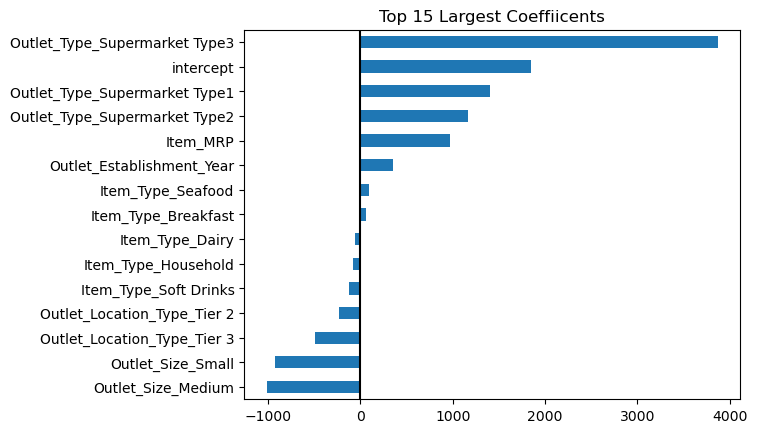

In [69]:
## Plot the coefficients
ax = plot_vals.sort_values().plot(kind='barh')#,figsize=(5,6))
ax.axvline(0,color='k')
ax.set_title(f'Top {top_n} Largest Coeffiicents');



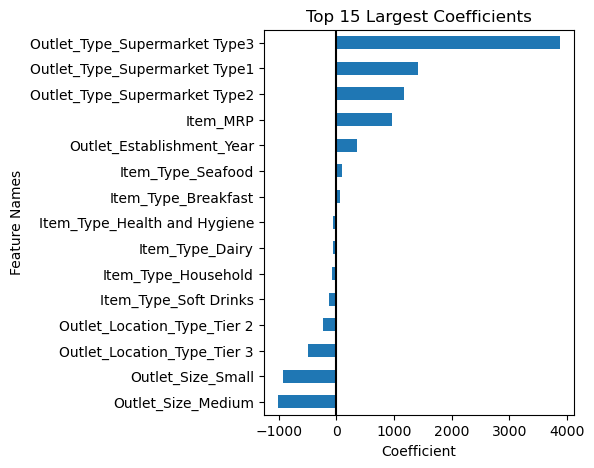

In [70]:
## Testing our function with intercept=False (the default)
ax= plot_coeffs(coeffs,top_n=15)


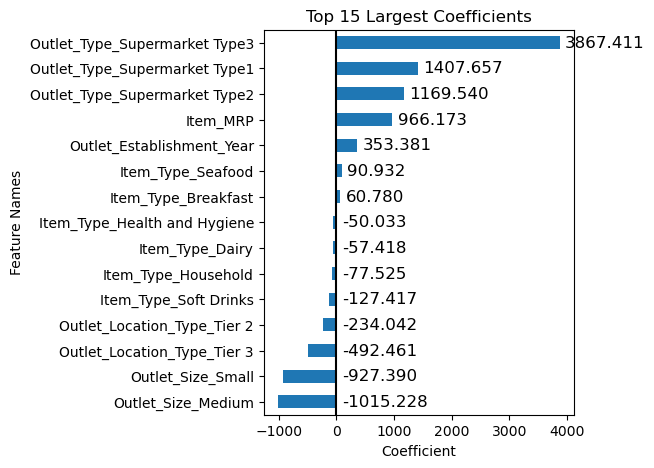

In [71]:
plot_coeffs(coeffs, top_n=15, annotate=True);

## LinearRegression coefficients plot

Training Data:	R^2= 0.56	RMSE= 1115.38
Test Data:	R^2= 0.56	RMSE= 1164.77


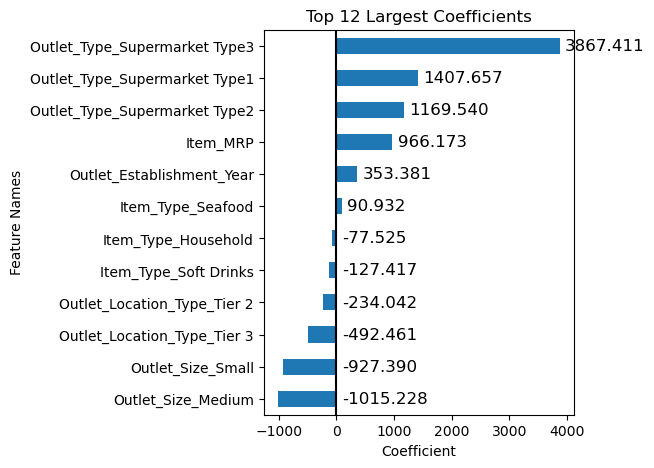

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
evaluate_regression(lin_reg, X_train, y_train, X_test,y_test)
coeffs = get_coeffs_linreg(lin_reg)
plot_coeffs(coeffs,top_n=12,annotate=True);


### Stakeholder Observations
In this section, we provide detailed observations based on the visualizations and analyses performed in this notebook, aimed at offering valuable insights to stakeholders:

1. **Item_MRP vs. Item_Outlet_Sales:**
   - **Observation:** A potential positive correlation between the Maximum Retail Price (Item_MRP) and the sales of that item in the outlet (Item_Outlet_Sales) has been observed. This suggests that items with a higher price tag tend to have higher sales in the outlets.
   - **Stakeholder Insight:** Optimizing the pricing strategy of items, especially those in the higher price range, can be a key driver to maximize revenue and enhance overall sales performance in the outlets.

2. **Item_Visibility vs. Item_Outlet_Sales:**
   - **Observation:** A potential negative correlation between the visibility of an item (Item_Visibility) and its sales (Item_Outlet_Sales) has been observed. This might suggest that items with higher visibility in the store do not necessarily translate to higher sales.
   - **Stakeholder Insight:** A meticulous review of product placement and visibility strategies is essential. Adjusting the visibility of products that are underperforming despite high visibility can lead to changes in the model's predictions improved sales outcomes.

3. **Outlet_Identifier_OUT027 vs. Item_Outlet_Sales:**
   - **Observation:** The outlet identified as 'OUT027' potentially showcases higher sales compared to others. This can be attributed to several factors such as strategic location, consumer demographic, and diverse product availability.
   - **Stakeholder Insight:** Investigating the unique attributes and operational strategies of 'OUT027' can offer valuable insights. Replicating successful strategies in other outlets can potentially uplift their sales performance.

4. **Feature Importance Insights:**
   - **Observation:** Features like ‘Item_MRP’ and ‘Outlet_Type’ potentially have significant importance in predicting sales, suggesting that pricing and the type of outlet play crucial roles in sales outcomes.
   - **Stakeholder Insight:** Focusing on the enhancement and optimization of the most impactful features can lead to changes in the model's predictions the development of effective strategies and interventions to boost sales. A balanced approach addressing both pricing and outlet type can yield synergistic results in sales improvement.

### Recommendations for Stakeholders:
- **Optimize Pricing Strategies:** Leverage the positive impact of 'Item_MRP' on sales by optimizing pricing strategies to enhance revenue.
- **Review Product Visibility:** Investigate and mitigate the negative impacts of 'Item_Visibility' on sales by revising product placement and visibility strategies.
- **Leverage Successful Outlet Strategies:** Explore and replicate the successful attributes and strategies of high-performing outlets like 'OUT027' in other outlets to uplift overall sales.
- **Focus on Impactful Features:** Develop balanced and effective strategies addressing the most impactful features identified in the feature importance analysis to enhance sales outcomes.
